In [146]:
# import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

## 1. HR Analytics

### 1.1 Load and Explore the data

In [147]:
df = pd.read_csv('hr_data.csv') # load the data set into dataframe
df_hr = df.copy() # create a copy
df_hr.head() # show overview of the dataset


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [148]:
df_hr.info() # too see the information for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


### Numeric data

In [149]:
# Numeric data
df_num = df_hr.select_dtypes(['int64', 'float64']).copy() # to get data only with float64 and int64 datatype
df_num.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,1,0,49,0
1,65141,1,30,5.0,4,0,0,60,0
2,7513,1,34,3.0,7,0,0,50,0
3,2542,2,39,1.0,10,0,0,50,0
4,48945,1,45,3.0,2,0,0,73,0


In [150]:
df_num.describe() # to obtain some information

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


Text(0.5, 0.98, 'Numerical Variables')

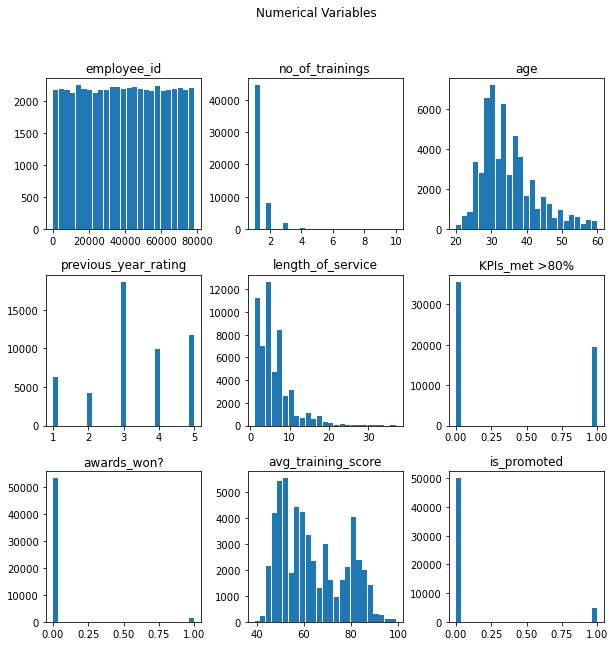

In [151]:
ax = df_num.hist(bins=25, grid=False, figsize=(10,10),zorder=2, rwidth=0.9)# plot the histogram for all numeric variables
plt.suptitle("Numerical Variables")

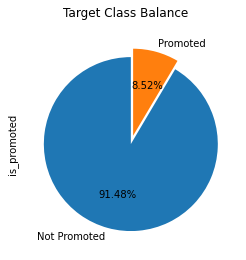

In [152]:
# see the target calss balance or not
plt.subplot(1, 1, 1)
df_hr['is_promoted'].value_counts().plot(kind = 'pie', explode = [0, 0.1], autopct = '%.2f%%', 
                                         startangle = 90,labels = ['Not Promoted','Promoted'])

plt.suptitle('Target Class Balance', fontsize = 12)
plt.show()

### Categorical data

In [153]:
# categorical data
df_cat = df_hr.select_dtypes(['object']).copy()
df_cat.head()

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other


In [154]:
df_cat.describe() # to obtain some information

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [155]:
df_cat.nunique() # to see unique values in different column

department              9
region                 34
education               3
gender                  2
recruitment_channel     3
dtype: int64

In [156]:
#show unique values
for col in df_cat:
    print (col+ " :")
    print(df_cat[col].unique())

department :
['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
region :
['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
education :
["Master's & above" "Bachelor's" nan 'Below Secondary']
gender :
['f' 'm']
recruitment_channel :
['sourcing' 'other' 'referred']


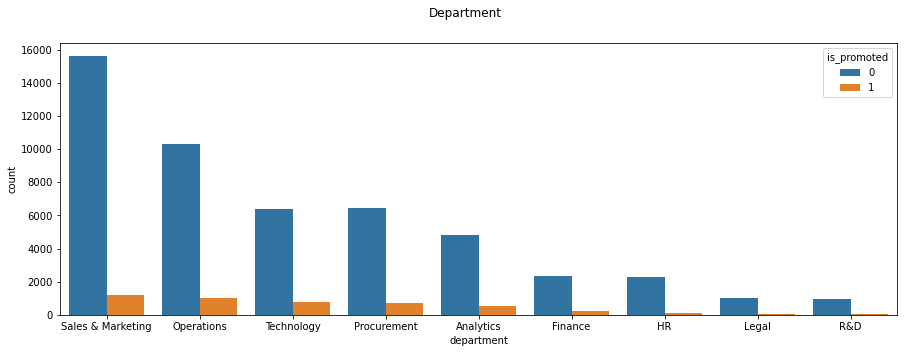

In [157]:
# bar graph for department
plt.figure(figsize=(15,5))
ax = sns.countplot(x="department",data=df_hr, hue='is_promoted',order = df_cat['department'].value_counts().index)
plt.suptitle("Department")
plt.show()

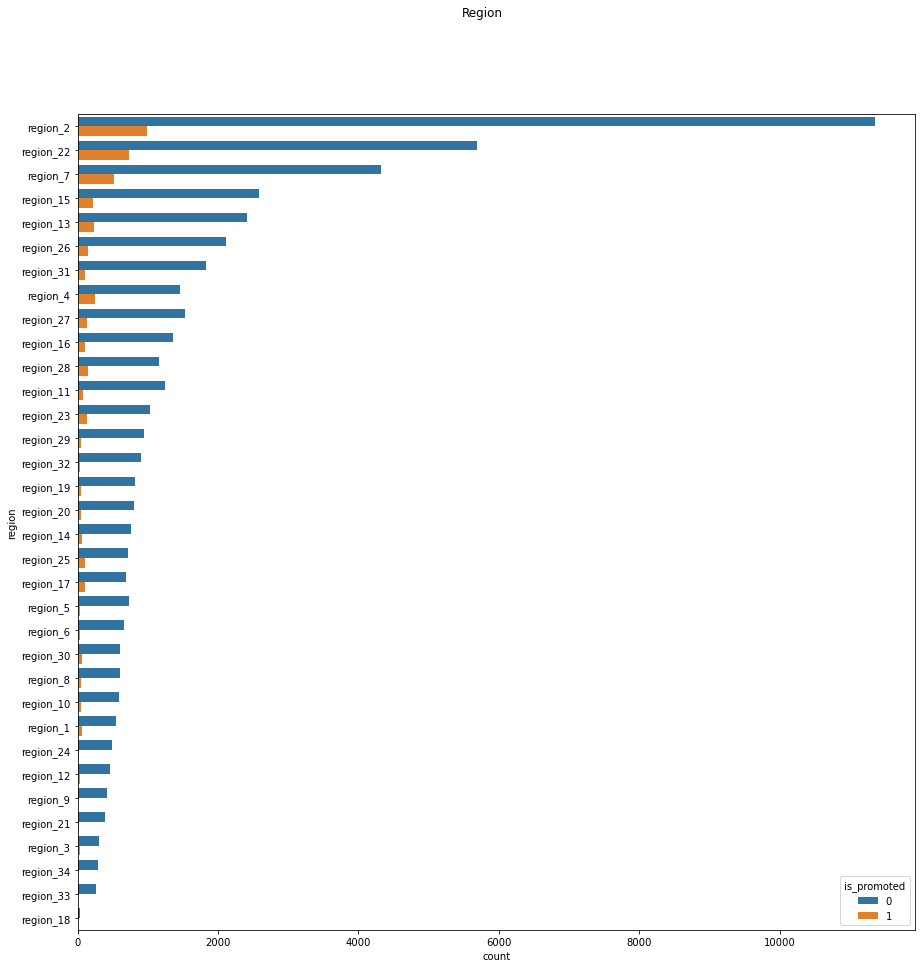

In [158]:
# bar graph for region
plt.figure(figsize=(15,15))
ax = sns.countplot(y="region",data=df_hr,hue='is_promoted',order = df_cat['region'].value_counts().index)
plt.suptitle("Region")
plt.show()

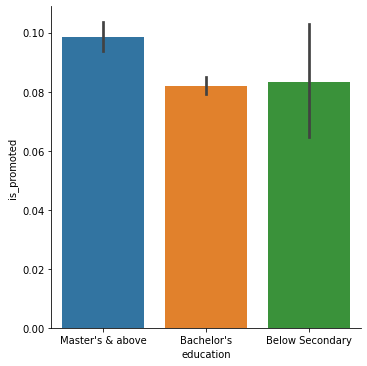

In [159]:
# bar graph for education

sns.catplot(x="education", y="is_promoted", kind="bar", data=df_hr)

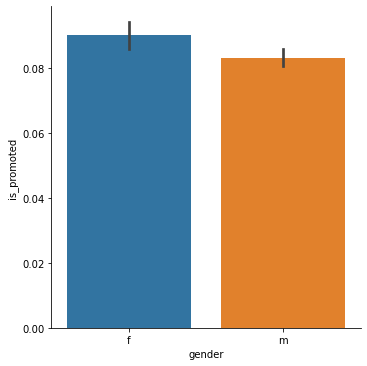

In [160]:
#gender

sns.catplot(x="gender", y="is_promoted", kind="bar", data=df_hr)

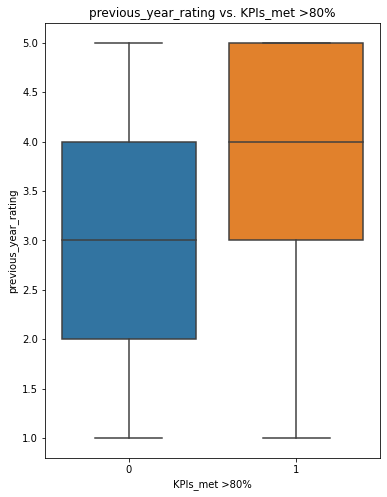

In [161]:
# KPIs_met >80% vs previous_year_rating

plt.figure(figsize=(6,8))
sns.boxplot(y='previous_year_rating', x='KPIs_met >80%', data=df_hr)
plt.title('previous_year_rating vs. KPIs_met >80%')
plt.show()

### 1.2 Cleanse and Transform the data

In [162]:
df_hr.info() # too see the information for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [163]:
df_hr.isnull().sum() # to check are there null values

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

### fill up NA

In [164]:
#fill up na
# education
df_hr['education'] = df_hr['education'].fillna('Not Applicable')
#previous_year_rating
df_hr['previous_year_rating'] = df_hr['previous_year_rating'].fillna(df_hr['previous_year_rating'].median())
df_hr['previous_year_rating'] = df_hr['previous_year_rating'].astype(float)
df_hr.isnull().sum() # to check are there null values

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

### transform categorical data into numbers

In [165]:
df_cat.nunique() # to see how many need to be mapped for category

department              9
region                 34
education               3
gender                  2
recruitment_channel     3
dtype: int64

In [166]:
# department
df_hr['department'] = df_hr['department'].map( {'Sales & Marketing':0, 'Operations':1, 'Technology':2, 'Analytics':3,
       'R&D':4, 'Procurement':5, 'Finance':6, 'HR':7, 'Legal':8} ).astype(int)
# education
df_hr['education'] = df_hr['education'].map( {"Master's & above": 0, "Bachelor's": 1, 
                                              "Below Secondary" : 2, "Not Applicable": 3} ).astype(int)

#region, drop coz too many unique values, and not relavent to the promotion

df_hr = df_hr.drop(['region'], axis = 1)

# gender
df_hr['gender'] = df_hr['gender'].map( {'f': 0, 'm': 1} ).astype(int)
df_hr.head()
                                      
# recruitment_channel
df_hr['recruitment_channel'] = df_hr['recruitment_channel'].map( {'sourcing': 0, 'referred': 1,'other':2} ).astype(int)
df_hr.head()

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,0,0,0,0,1,35,5.0,8,1,0,49,0
1,65141,1,1,1,2,1,30,5.0,4,0,0,60,0
2,7513,0,1,1,0,1,34,3.0,7,0,0,50,0
3,2542,0,1,1,2,2,39,1.0,10,0,0,50,0
4,48945,2,1,1,2,1,45,3.0,2,0,0,73,0


### stratified sampling

In [167]:
# See how is it balance
df_hr['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [168]:
df1=df_hr[df_hr['is_promoted']==1] # when it is = 1
df1.head()

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
11,49017,0,1,0,0,1,35,5.0,3,1,0,50,1
39,58304,0,1,1,0,1,33,5.0,6,1,0,51,1
60,17673,0,0,1,2,1,50,4.0,17,1,0,47,1
66,77981,6,1,1,2,1,27,3.0,1,1,1,58,1
67,16502,0,1,1,0,1,27,3.0,1,0,0,61,1


In [169]:
len(df1) # check the length of 1

4668

In [170]:
df0=df_hr[df_hr['is_promoted']==0] # when it is = 0
df0.head()

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,0,0,0,0,1,35,5.0,8,1,0,49,0
1,65141,1,1,1,2,1,30,5.0,4,0,0,60,0
2,7513,0,1,1,0,1,34,3.0,7,0,0,50,0
3,2542,0,1,1,2,2,39,1.0,10,0,0,50,0
4,48945,2,1,1,2,1,45,3.0,2,0,0,73,0


In [171]:
df0_sampled = df0.sample(n=len(df1), random_state=2).copy()
df0_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4668 entries, 6725 to 12976
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           4668 non-null   int64  
 1   department            4668 non-null   int32  
 2   education             4668 non-null   int32  
 3   gender                4668 non-null   int32  
 4   recruitment_channel   4668 non-null   int32  
 5   no_of_trainings       4668 non-null   int64  
 6   age                   4668 non-null   int64  
 7   previous_year_rating  4668 non-null   float64
 8   length_of_service     4668 non-null   int64  
 9   KPIs_met >80%         4668 non-null   int64  
 10  awards_won?           4668 non-null   int64  
 11  avg_training_score    4668 non-null   int64  
 12  is_promoted           4668 non-null   int64  
dtypes: float64(1), int32(4), int64(8)
memory usage: 437.6 KB


In [172]:
df_hr=pd.concat([df1,df0_sampled],axis=0)
df_hr['is_promoted'].value_counts()

0    4668
1    4668
Name: is_promoted, dtype: int64

In [173]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9336 entries, 11 to 12976
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           9336 non-null   int64  
 1   department            9336 non-null   int32  
 2   education             9336 non-null   int32  
 3   gender                9336 non-null   int32  
 4   recruitment_channel   9336 non-null   int32  
 5   no_of_trainings       9336 non-null   int64  
 6   age                   9336 non-null   int64  
 7   previous_year_rating  9336 non-null   float64
 8   length_of_service     9336 non-null   int64  
 9   KPIs_met >80%         9336 non-null   int64  
 10  awards_won?           9336 non-null   int64  
 11  avg_training_score    9336 non-null   int64  
 12  is_promoted           9336 non-null   int64  
dtypes: float64(1), int32(4), int64(8)
memory usage: 875.2 KB


### 1.3 Correlation Analysis

In [174]:
df_hr.corr()

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,0.011862,0.002569,0.011117,-0.003157,-0.010528,0.010593,0.027991,-0.000778,0.012639,0.038093,0.012452,0.018335
department,0.011862,1.000000,-0.070005,-0.106450,0.002964,-0.002269,-0.053137,0.054497,-0.048511,0.034082,0.002740,0.285693,-0.004543
education,0.002569,-0.070005,1.000000,0.072266,-0.012209,0.014368,-0.389640,-0.061395,-0.264101,-0.039957,-0.013329,-0.067106,-0.072846
gender,0.011117,-0.106450,0.072266,1.000000,-0.019234,0.077464,-0.030575,-0.022987,-0.019674,-0.026376,0.006760,-0.021409,-0.021415
recruitment_channel,-0.003157,0.002964,-0.012209,-0.019234,1.000000,0.015461,0.025445,-0.006253,0.016445,-0.010142,-0.000760,-0.003339,-0.004596
no_of_trainings,-0.010528,-0.002269,0.014368,0.077464,0.015461,1.000000,-0.073286,-0.058502,-0.042717,-0.034267,-0.020329,0.042947,-0.044717
age,0.010593,-0.053137,-0.389640,-0.030575,0.025445,-0.073286,1.000000,0.050753,0.649614,-0.026295,-0.000293,-0.057514,-0.030066
previous_year_rating,0.027991,0.054497,-0.061395,-0.022987,-0.006253,-0.058502,0.050753,1.000000,0.039973,0.276950,0.057770,0.129430,0.284443
length_of_service,-0.000778,-0.048511,-0.264101,-0.019674,0.016445,-0.042717,0.649614,0.039973,1.000000,-0.046991,-0.056516,-0.035430,-0.010412
KPIs_met >80%,0.012639,0.034082,-0.039957,-0.026376,-0.010142,-0.034267,-0.026295,0.276950,-0.046991,1.000000,0.038701,0.032562,0.380519


In [175]:
# drop more column after looking at the correlation table
df_hr = df_hr.drop(['employee_id','department','recruitment_channel'], axis = 1)
# drop all this because based on the table i can see that they are not very related to our target, as the all non-zero nunbers starts ar 3rd decimal place

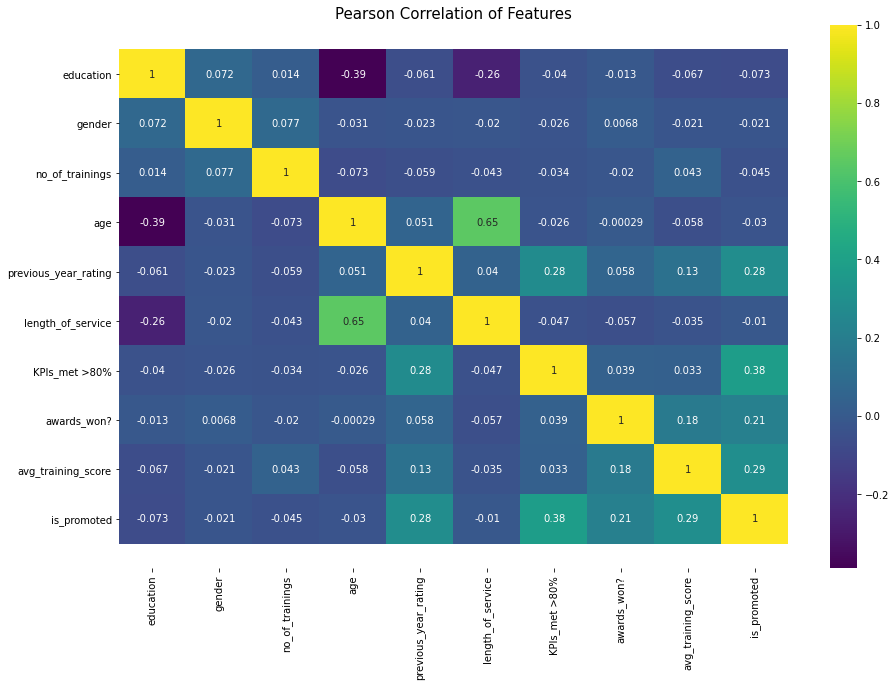

In [176]:
colormap = plt.cm.viridis
plt.figure(figsize=(15,10))
plt.title('Pearson Correlation of Features', size=15)
ax = sns.heatmap(df_hr.astype(float).corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

previous_year_rating, _KPIs_met_>80%, awards_won, avg_training_score might be useful

### 1.4 Export the data

In [177]:
df_hr.to_csv('hr_data_new.csv', index=False)

## 2. Airbnb

### 2.1 Load and Explore the data

In [178]:
df = pd.read_csv('listings.csv') # load the data set into dataframe
df_ab = df.copy() # create a copy
df_ab.head() # show overview of the dataset

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [179]:
df_ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

### Numeric data


In [180]:
# Numeric data
df_ab_num = df_ab.select_dtypes(['int64', 'float64']).copy() # to get data only with float64 and int64 datatype
df_ab_num.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,266763,1.44255,103.79580,83,180,1,0.01,2,365
1,50646,227796,1.33235,103.78521,81,90,18,0.28,1,365
2,56334,266763,1.44246,103.79667,69,6,20,0.20,2,365
3,71609,367042,1.34541,103.95712,206,1,14,0.15,9,353
4,71896,367042,1.34567,103.95963,94,1,22,0.22,9,355


In [181]:
df_ab_num.describe() # to obtain some information

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7.907000e+03,7.907000e+03,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,5149.000000,7907.000000,7907.000000
mean,2.338862e+07,9.114481e+07,1.314192,103.848787,169.332996,17.510054,12.807386,1.043669,40.607689,208.726318
std,1.016416e+07,8.190910e+07,0.030577,0.043675,340.187599,42.094616,29.707746,1.285851,65.135253,146.120034
min,4.909100e+04,2.366600e+04,1.243870,103.646560,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.582180e+07,2.305808e+07,1.295795,103.835825,65.000000,1.000000,0.000000,0.180000,2.000000,54.000000
50%,2.470627e+07,6.344891e+07,1.311030,103.849410,124.000000,3.000000,2.000000,0.550000,9.000000,260.000000
75%,3.234850e+07,1.553811e+08,1.322110,103.872535,199.000000,10.000000,10.000000,1.370000,48.000000,355.000000
max,3.811276e+07,2.885676e+08,1.454590,103.973420,10000.000000,1000.000000,323.000000,13.000000,274.000000,365.000000


Text(0.5, 0.98, 'Numerical Variables')

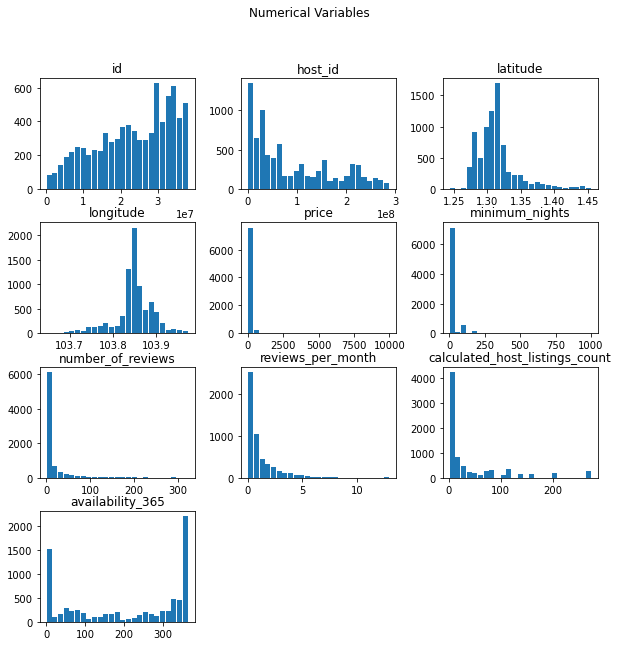

In [182]:
# plot the histogram for all numeric variables
ax = df_ab_num.hist(bins=25, grid=False, figsize=(10,10),zorder=2, rwidth=0.9)
plt.suptitle("Numerical Variables")

<AxesSubplot:xlabel='price', ylabel='Count'>

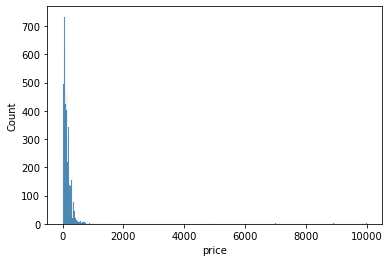

In [183]:
#check the target price's distribution
sns.histplot(df["price"])

### Categorical Data

In [184]:
# categorical data
df_cat = df_ab.select_dtypes(['object']).copy()
df_cat.head()

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
0,COZICOMFORT LONG TERM STAY ROOM 2,Francesca,North Region,Woodlands,Private room,2013-10-21
1,Pleasant Room along Bukit Timah,Sujatha,Central Region,Bukit Timah,Private room,2014-12-26
2,COZICOMFORT,Francesca,North Region,Woodlands,Private room,2015-10-01
3,Ensuite Room (Room 1 & 2) near EXPO,Belinda,East Region,Tampines,Private room,2019-08-11
4,B&B Room 1 near Airport & EXPO,Belinda,East Region,Tampines,Private room,2019-07-28


In [185]:
df_cat.describe() # to obtain some information

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,7905,7907,7907,7907,7907,5149
unique,7457,1833,5,43,3,1001
top,Luxury hostel with in-cabin locker - Single mixed,Jay,Central Region,Kallang,Entire home/apt,2019-08-12
freq,13,290,6309,1043,4132,152


In [186]:
# to show the unique feature
for col in df_cat:
    print (col+ " :")
    print(df_cat[col].unique())

name :
['COZICOMFORT LONG TERM STAY ROOM 2' 'Pleasant Room along Bukit Timah'
 'COZICOMFORT' ... '[ Farrer Park ] New City Fringe CBD Mins to MRT'
 'Cheap Master Room in Central of Singapore'
 'Amazing room with private bathroom walk to Orchard']
host_name :
['Francesca' 'Sujatha' 'Belinda' ... 'Jolene' 'Ryokuka' 'Bo']
neighbourhood_group :
['North Region' 'Central Region' 'East Region' 'West Region'
 'North-East Region']
neighbourhood :
['Woodlands' 'Bukit Timah' 'Tampines' 'Bedok' 'Bukit Merah' 'Newton'
 'Geylang' 'River Valley' 'Jurong West' 'Rochor' 'Queenstown' 'Serangoon'
 'Marine Parade' 'Pasir Ris' 'Toa Payoh' 'Outram' 'Punggol' 'Tanglin'
 'Hougang' 'Kallang' 'Novena' 'Downtown Core' 'Bukit Panjang'
 'Singapore River' 'Orchard' 'Ang Mo Kio' 'Bukit Batok' 'Museum'
 'Sembawang' 'Choa Chu Kang' 'Central Water Catchment' 'Sengkang'
 'Clementi' 'Jurong East' 'Bishan' 'Yishun' 'Mandai' 'Southern Islands'
 'Sungei Kadut' 'Western Water Catchment' 'Tuas' 'Marina South'
 'Lim Chu Kang']

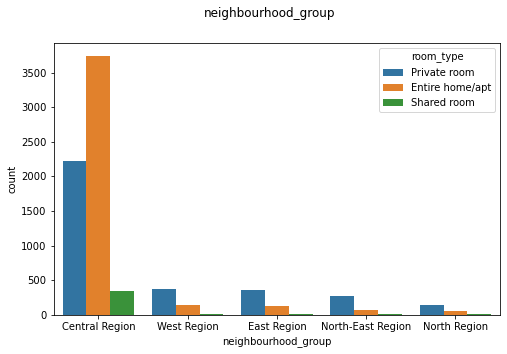

In [187]:
# neighbourhood group and roomtype
plt.figure(figsize=(8,5))
ax = sns.countplot(x ="neighbourhood_group",hue="room_type",data=df_ab,order = df_cat['neighbourhood_group'].value_counts().index)
plt.suptitle("neighbourhood_group")
plt.show()


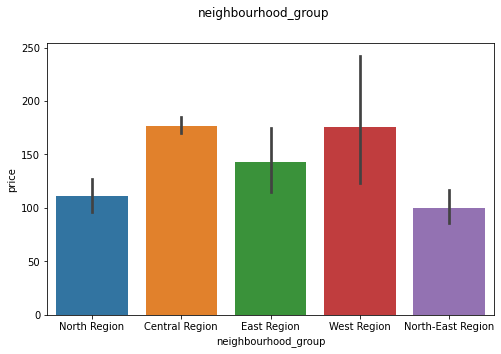

In [188]:
# neighbourhood and price
plt.figure(figsize=(8,5))
ax = sns.barplot(x='neighbourhood_group',y="price",data=df_ab)
plt.suptitle("neighbourhood_group")
plt.show()

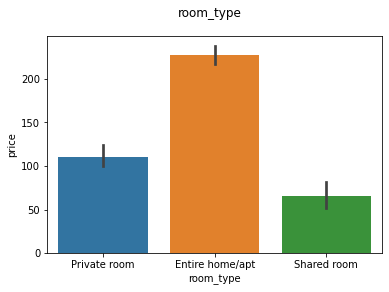

In [189]:
# room type and price
plt.figure(figsize=(6,4))
ax = sns.barplot(x='room_type',y="price",data=df_ab)
plt.suptitle("room_type")
plt.show()

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


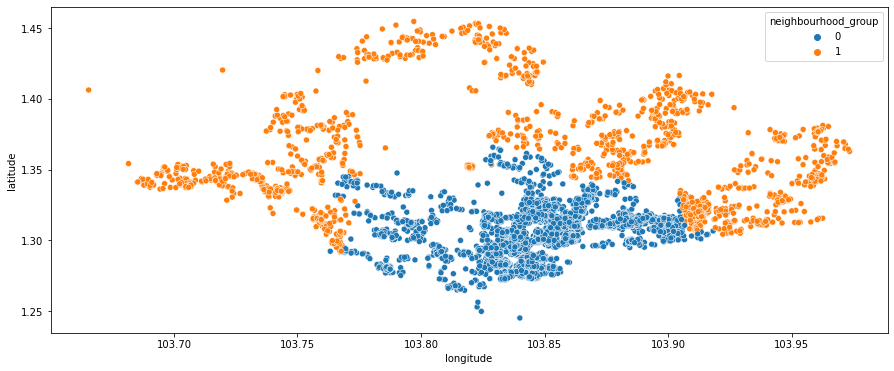

In [214]:
# make use of longtitude and latitude
plt.figure(figsize=(15,6))
sns.scatterplot(df_ab.longitude,df_ab.latitude,hue=df_ab.neighbourhood_group)
plt.ioff()


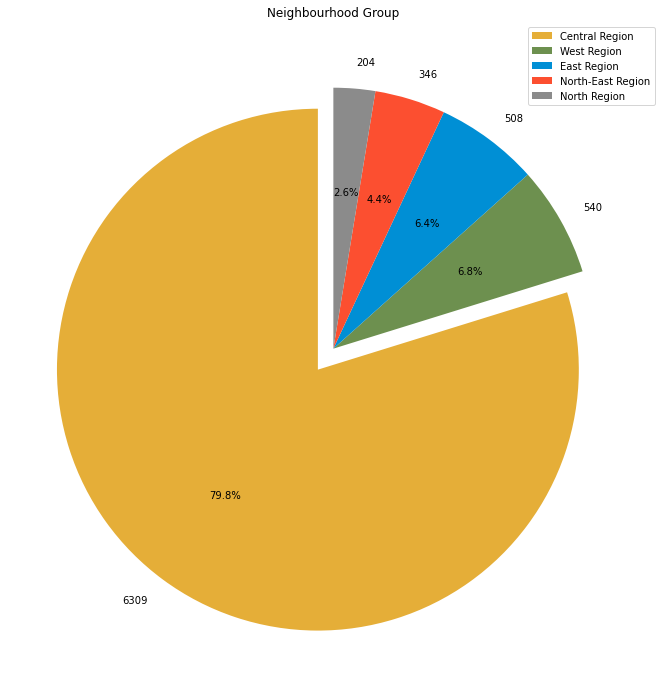

In [190]:
# show the percentage for different region in the neighbourhood group
labels = df_ab.neighbourhood_group.value_counts().index
colors = ['#e5ae38','#6d904f','#008fd5','#fc4f30','#8b8b8b']
explode = (0.1,0,0,0,0)
shape = df_ab.neighbourhood_group.value_counts().values
plt.figure(figsize=(12,12))
plt.pie(shape, explode = explode, labels=shape, colors= colors, autopct = '%1.1f%%', startangle=90)
plt.legend(labels)
plt.title('Neighbourhood Group')
plt.show()

In [191]:
df_cat.nunique() # too see unique values in different column

name                   7457
host_name              1833
neighbourhood_group       5
neighbourhood            43
room_type                 3
last_review            1001
dtype: int64

### 2.2 Cleanse and Transform the data

In [192]:
df_ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

In [193]:
# check for null value
df_ab.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [194]:
# count unique feature
df_ab.nunique()

id                                7907
name                              7457
host_id                           2705
host_name                         1833
neighbourhood_group                  5
neighbourhood                       43
latitude                          4885
longitude                         5414
room_type                            3
price                              374
minimum_nights                      73
number_of_reviews                  208
last_review                       1001
reviews_per_month                  527
calculated_host_listings_count      55
availability_365                   359
dtype: int64

In [195]:

# fill up na
df_ab['reviews_per_month'] = df_ab['reviews_per_month'].fillna(df_ab['reviews_per_month'].median())
df_ab['reviews_per_month'] = df_ab['reviews_per_month'].astype(float)
df_ab.isnull().sum()


id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [196]:
# drop the irrelevant features
df_ab = df_ab.drop(['name','id','host_name', 'host_id', 'last_review','neighbourhood'], axis = 1)
df_ab.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             7907 non-null   object 
 1   latitude                        7907 non-null   float64
 2   longitude                       7907 non-null   float64
 3   room_type                       7907 non-null   object 
 4   price                           7907 non-null   int64  
 5   minimum_nights                  7907 non-null   int64  
 6   number_of_reviews               7907 non-null   int64  
 7   reviews_per_month               7907 non-null   float64
 8   calculated_host_listings_count  7907 non-null   int64  
 9   availability_365                7907 non-null   int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 617.9+ KB


drop name, id, hostname, hostid, because all of them is just an identification, it wont affect anything for the price

drop the last review as there are too many unique variables and last review is not too important that will affect the price
because the review only affect how shoulkd customer choose, but it will not affect the price of the airbnb

drop the neighbourhood because there is another neighbourhood which can represent the small country singapore
also becasue there are too many unique values in this feature.

### Transform categorical data into numbers

In [197]:
df_ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             7907 non-null   object 
 1   latitude                        7907 non-null   float64
 2   longitude                       7907 non-null   float64
 3   room_type                       7907 non-null   object 
 4   price                           7907 non-null   int64  
 5   minimum_nights                  7907 non-null   int64  
 6   number_of_reviews               7907 non-null   int64  
 7   reviews_per_month               7907 non-null   float64
 8   calculated_host_listings_count  7907 non-null   int64  
 9   availability_365                7907 non-null   int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 617.9+ KB


In [198]:
#converting neighbourhood_group into others and central region
df_ab['neighbourhood_group'] = df_ab.neighbourhood_group.map(lambda x: 'Central Region' 
                                                             if x == 'Central Region' else 'Others')
df_ab.neighbourhood_group.value_counts()

Central Region    6309
Others            1598
Name: neighbourhood_group, dtype: int64

In [199]:
df_ab['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [200]:
# neighbourhood_group
df_ab['neighbourhood_group'] = df_ab['neighbourhood_group'].map( {'Central Region':0,'Others':1} ).astype(int)
# room_type
df_ab['room_type'] = df_ab['room_type'].map( {"Private room": 0, "Entire home/apt": 1, "Shared room" : 2} ).astype(int)

df_ab.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,1.44255,103.79580,0,83,180,1,0.01,2,365
1,0,1.33235,103.78521,0,81,90,18,0.28,1,365
2,1,1.44246,103.79667,0,69,6,20,0.20,2,365
3,1,1.34541,103.95712,0,206,1,14,0.15,9,353
4,1,1.34567,103.95963,0,94,1,22,0.22,9,355


In [201]:
# check
df_ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             7907 non-null   int32  
 1   latitude                        7907 non-null   float64
 2   longitude                       7907 non-null   float64
 3   room_type                       7907 non-null   int32  
 4   price                           7907 non-null   int64  
 5   minimum_nights                  7907 non-null   int64  
 6   number_of_reviews               7907 non-null   int64  
 7   reviews_per_month               7907 non-null   float64
 8   calculated_host_listings_count  7907 non-null   int64  
 9   availability_365                7907 non-null   int64  
dtypes: float64(3), int32(2), int64(5)
memory usage: 556.1 KB


### Identifying and removing outliers

Text(0.5, 0.98, 'Histograms to check outliers')

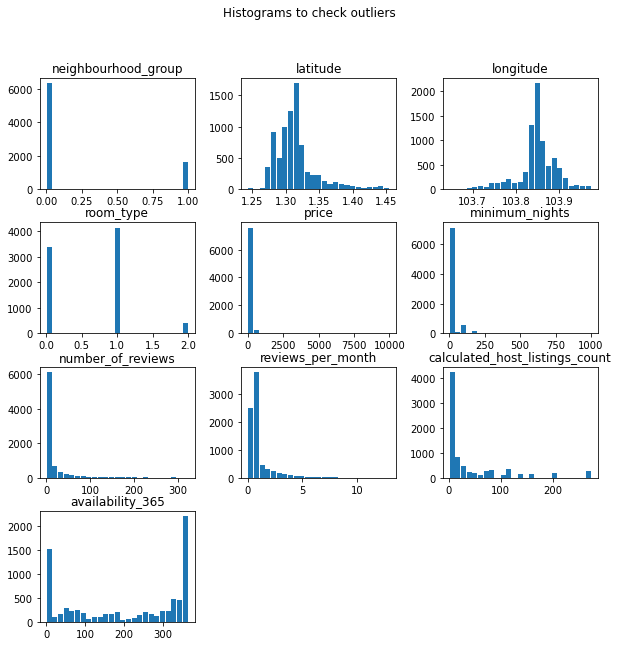

In [202]:
# plot histo to check outliers
ax = df_ab.hist(bins=25, grid=False, figsize=(10,10),zorder=2, rwidth=0.9)# plot the histogram for all numeric variables
plt.suptitle("Histograms to check outliers")

In [203]:
# removing outlier for price
# due to the extreme outlier in the price column, decided to remove the outlier based on qurtile range
q1=df_ab['price'].quantile(0.25)
q3=df_ab['price'].quantile(0.75)
outlier=[]
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
for i in df_ab['price']:
    if i<lower_bound or i>upper_bound:
            outlier.append(i)   

<AxesSubplot:ylabel='Count'>

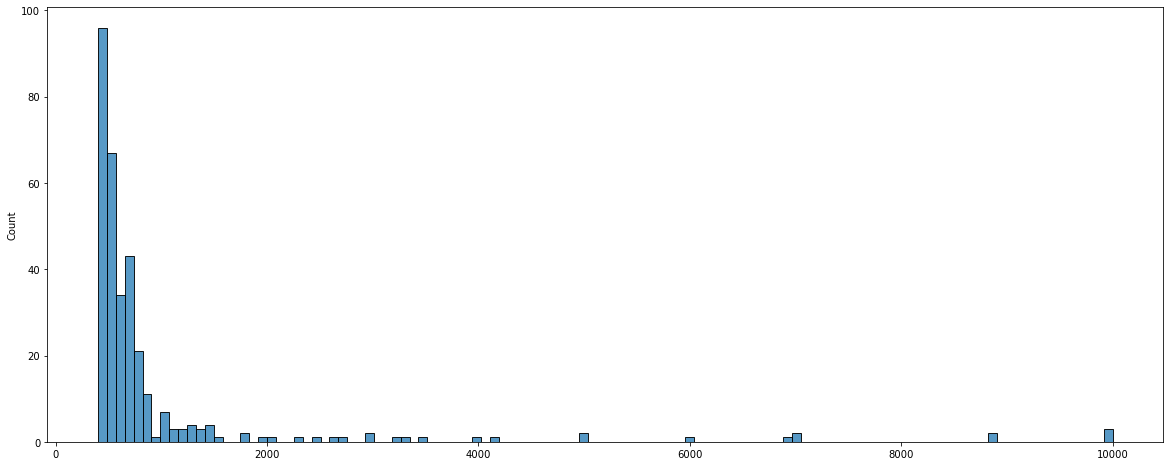

In [204]:
# see how is it distributed
plt.figure(figsize=(20,8))
sns.histplot(outlier)

In [205]:
# there are so many outliers, i decided to cut down the price range up to 400 as 75% for price is 199, which i think 400 will be reasonable
df_ab = df_ab[df_ab['price'] <400]

<AxesSubplot:xlabel='price', ylabel='Count'>

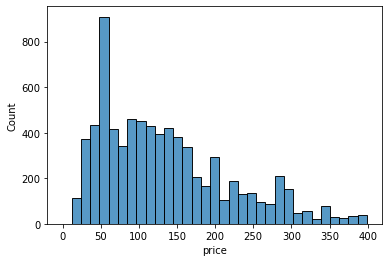

In [206]:
# after removing outlier
sns.histplot(df_ab["price"])

In [207]:
# remove outlier for minimum_nights
q1=df_ab['minimum_nights'].quantile(0.25)
q3=df_ab['minimum_nights'].quantile(0.75)
outlier2=[]
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
for i in df_ab['minimum_nights']:
    if i<lower_bound or i>upper_bound:
            outlier2.append(i) 

<AxesSubplot:ylabel='Count'>

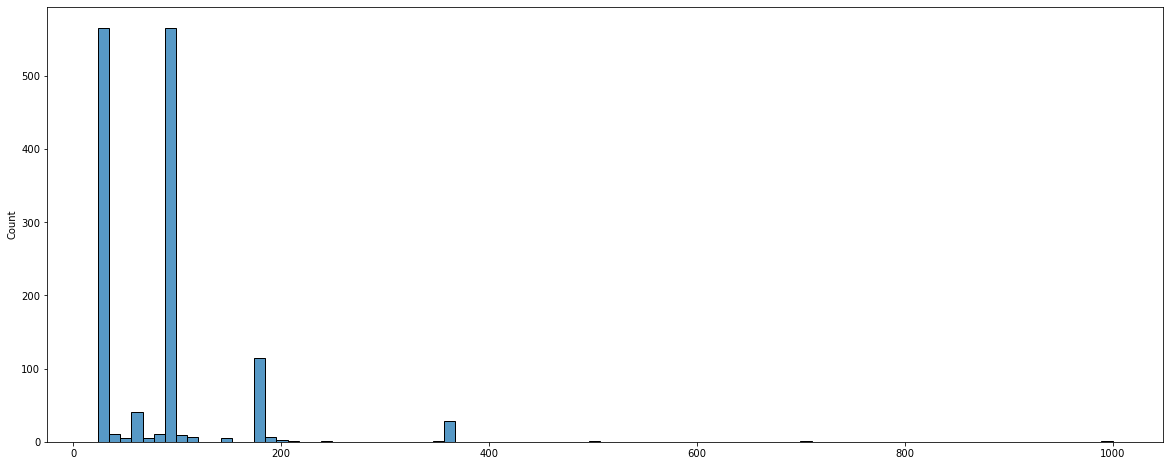

In [208]:
plt.figure(figsize=(20,8))
sns.histplot(outlier2)

In [209]:
# make it to only 365
df_ab = df_ab[df_ab['minimum_nights'] <365]
# it is because i can see a huge increase for numbert of minimum nights at around 350-370 area, thus i decided to make it 365 which stand for days in a year,so all value above 365 is an outlier

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'after removing outliers')

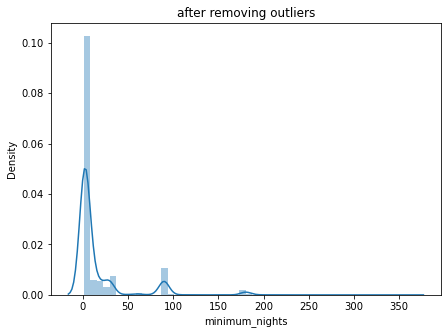

In [210]:
plt.figure(figsize=(7,5))
fig2=sns.distplot(df_ab['minimum_nights'])
plt.title('after removing outliers')

### 2.3 Correlation Analysis

In [211]:
df_ab.corr()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,1.000000,0.685289,-0.107135,-0.278597,-0.214609,0.086865,-0.014108,-0.045853,-0.206244,-0.088924
latitude,0.685289,1.000000,-0.039840,-0.218729,-0.196203,0.070484,-0.011257,-0.026568,-0.154477,-0.068927
longitude,-0.107135,-0.039840,1.000000,0.042647,0.019886,-0.055038,0.105626,0.100190,0.051382,-0.039590
room_type,-0.278597,-0.218729,0.042647,1.000000,0.360037,-0.123875,-0.022291,-0.014652,0.255887,0.087000
price,-0.214609,-0.196203,0.019886,0.360037,1.000000,-0.127993,-0.056223,0.023720,0.220479,0.106685
minimum_nights,0.086865,0.070484,-0.055038,-0.123875,-0.127993,1.000000,-0.089427,-0.139450,0.010692,0.172885
number_of_reviews,-0.014108,-0.011257,0.105626,-0.022291,-0.056223,-0.089427,1.000000,0.651518,-0.152623,-0.065280
reviews_per_month,-0.045853,-0.026568,0.100190,-0.014652,0.023720,-0.139450,0.651518,1.000000,-0.169555,-0.099146
calculated_host_listings_count,-0.206244,-0.154477,0.051382,0.255887,0.220479,0.010692,-0.152623,-0.169555,1.000000,0.246392
availability_365,-0.088924,-0.068927,-0.039590,0.087000,0.106685,0.172885,-0.065280,-0.099146,0.246392,1.000000


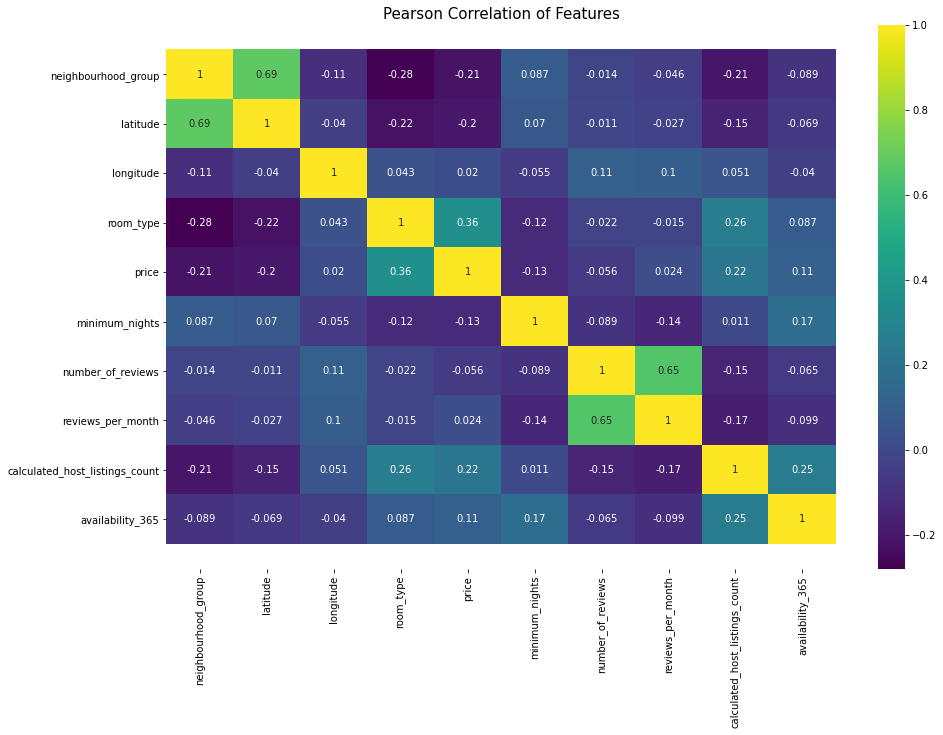

In [212]:
colormap = plt.cm.viridis
plt.figure(figsize=(15,10))
plt.title('Pearson Correlation of Features', size=15)
ax = sns.heatmap(df_ab.astype(float).corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

room_type, calculated_host_listing_count, neighbourhood_group, availability_365 might be useful

### 2.4 Export the data

In [213]:
df_ab.to_csv('listings_new.csv', index=False)